In [18]:
import pandas as pd
import re
import nltk
%matplotlib inline
from matplotlib import pyplot as plt
import string

In [2]:
imdb = pd.read_csv('imdb_reviews.csv')
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [3]:
imdb.shape

(748, 2)

In [4]:
imdb['sentiment'].value_counts()

1    386
0    362
Name: sentiment, dtype: int64

# Word Cloud
- 1. Combine all the reviews into the single string
- 2. Instantiate word cloud
- 3. Generate the word cloud

In [5]:
from wordcloud import WordCloud

In [6]:
# Wordcloud takes single string as its argument
# Joining all reviews together
imdb_combined = " ".join(imdb['review'].values)

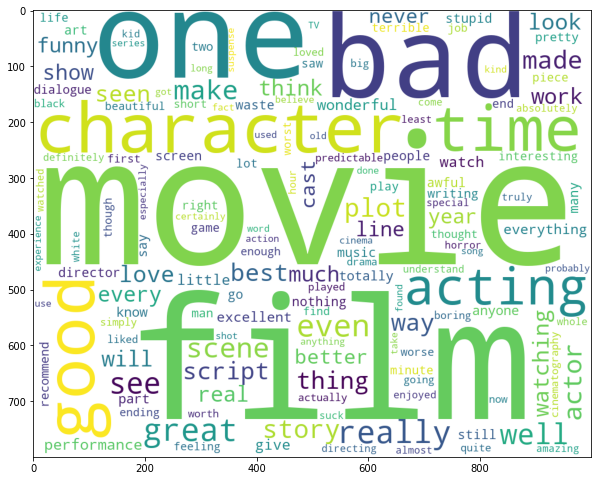

In [10]:
word_cloud = WordCloud(width = 1000, height = 800, background_color='white',max_words = 150).generate(imdb_combined)
# max_words = maximum number of words to consider based on frequency in the word cloud
plt.figure(figsize = [10,10])
plt.imshow(word_cloud)
plt.show()
# The size of the word is directly proportional to the frequency of the word.

## Bar Graph

In [12]:
from nltk.probability import FreqDist
# Seperating all words
all_terms = imdb_combined.split(" ")
fdist = FreqDist(all_terms)
# This gives the dictionary in which a word is the key and its value is the frequecy

In [13]:
# From the dictionary obtain a dataframe of words and frequencies
df_dist = pd.DataFrame(fdist.items(), columns = ['Word', 'Freq'])
df_dist.head()

,Word,Freq
0,A,16
1,"very,",4
2,very,54
3,"slow-moving,",1
4,aimless,1


In [14]:
# Top 5 word based on frequency
words = df_dist.sort_values(by = 'Freq', ascending = False)
words.head()

,Word,Freq
12,,1752
20,the,654
7,a,411
37,and,410
27,of,368


<AxesSubplot:xlabel='Word'>

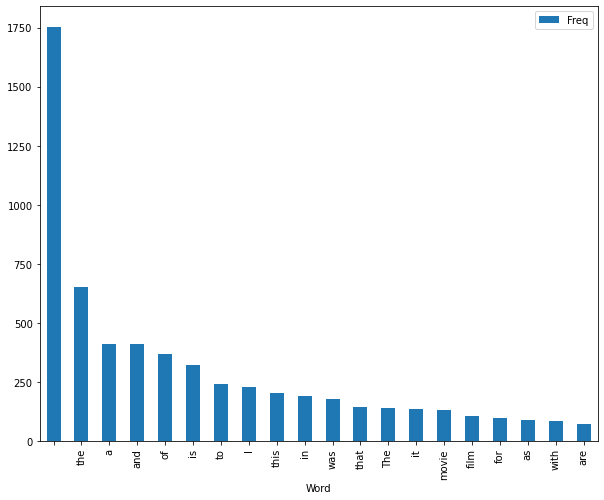

In [15]:
plt.rcParams['figure.figsize'] = (10,8)
words.head(20).plot(kind = 'bar', x = 'Word', y = 'Freq')
# Here all the stopwords are also coming, so we will plot a frequency graph after cleaning the text

## Cleaning the text

In [21]:
ps = nltk.PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')

In [22]:
# Creating a user defined function to perform all the above text cleaning in single fucntion
def clean_text(text):
    # Stripping white spaces before and after the text
    text = text.strip(" ")
    # Replacing multiple spaces with a single space
    text = re.sub("\s+"," ", text)
    # Replacing punctuations
    text = "".join([char for char in text if char not in string.punctuation])
    # Creating tokens
    tokens = re.split('\W+', text)
    # removing stopwords and stemming - snowball stemming
    text_final = [ps.stem(word) for word in tokens if word not in stopwords and len(word)>2]
    # creating a list of tokens
    text_final = " ".join(text_final)
    return text_final

In [23]:
imdb['cleaned_reviews'] = imdb['review'].apply(lambda x: clean_text(x.lower()))
imdb.head()

,review,sentiment,cleaned_reviews
0,"A very, very, very slow-moving, aimless movie ...",0,slowmov aimless movi distress drift young man
1,Not sure who was more lost - the flat characte...,0,sure lost flat charact audienc nearli half walk
2,Attempting artiness with black & white and cle...,0,attempt arti black white clever camera angl mo...
3,Very little music or anything to speak of.,0,littl music anyth speak
4,The best scene in the movie was when Gerardo i...,1,best scene movi gerardo tri find song keep run...


## Now plotting word cloud for cleaned reviews

In [24]:
imdb_positive = imdb[imdb['sentiment'] == 1]
imdb_negative = imdb[imdb['sentiment'] == 0]

In [27]:
imdb_positive_reviews = " ".join(imdb['cleaned_reviews'].values)
imdb_positive_reviews

'slowmov aimless movi distress drift young man sure lost flat charact audienc nearli half walk attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot line almost nonexist littl music anyth speak best scene movi gerardo tri find song keep run head rest movi lack art charm mean empti work guess empti wast two hour saw movi today thought good effort good messag kid bit predict love cast jimmi buffet scienc teacher babi owl ador movi show lot florida best made look appeal song best muppet hilari cool right case movi deliv everyth almost right face averag act main person low budget clearli see review long overdu sinc consid tale two sister singl greatest film ever made ill put gem movi term screenplay cinematographi act postproduct edit direct aspect filmmak practic perfect true masterpiec sea faux masterpiec structur film easili tightli construct histori cinema think film someth vital import occur everi minut word content level film enough easili fill 

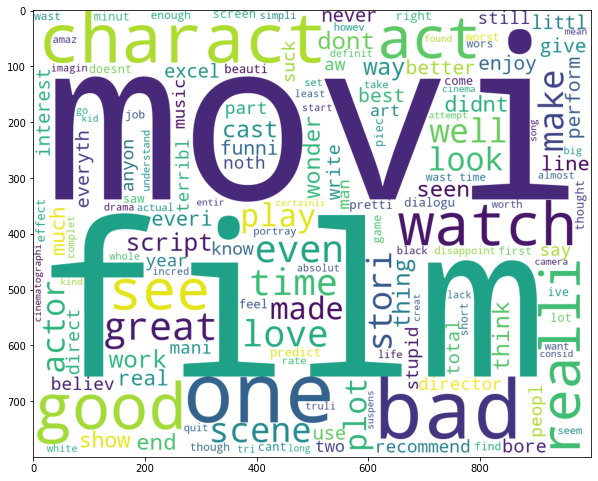

In [30]:
word_cloud = WordCloud(width = 1000, height = 800, background_color='white',max_words = 150).generate(imdb_positive_reviews)
# max_words = maximum number of words to consider based on frequency in the word cloud
plt.figure(figsize = [10,10])
plt.imshow(word_cloud)
plt.show()
# The size of the word is directly proportional to the frequency of the word.
# These are the top 150 words which occur most in the positive reviews

In [32]:
from nltk.probability import FreqDist
# Seperating all words
all_terms = imdb_positive_reviews.split(" ")
fdist = FreqDist(all_terms)
# This gives the dictionary in which a word is the key and its value is the frequecy

In [33]:
# From the dictionary obtain a dataframe of words and frequencies
df_dist = pd.DataFrame(fdist.items(), columns = ['Word', 'Freq'])
df_dist.head()

,Word,Freq
0,slowmov,1
1,aimless,1
2,movi,207
3,distress,1
4,drift,2


In [34]:
# Top 5 word based on frequency
words = df_dist.sort_values(by = 'Freq', ascending = False)
words.head()

,Word,Freq
2,movi,207
104,film,184
172,one,79
454,bad,67
240,like,59


<AxesSubplot:xlabel='Word'>

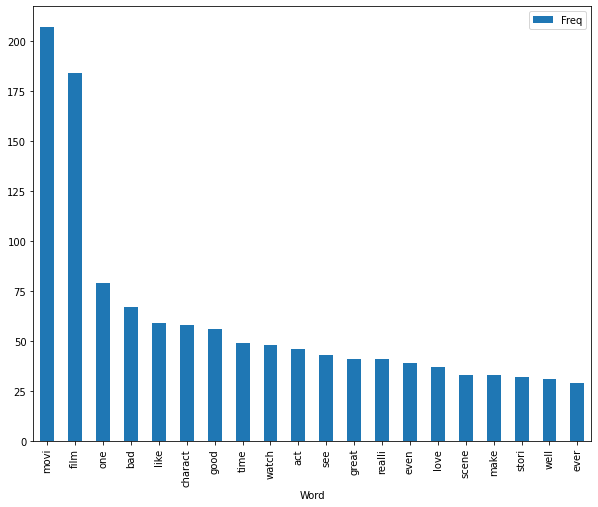

In [35]:
plt.rcParams['figure.figsize'] = (10,8)
words.head(20).plot(kind = 'bar', x = 'Word', y = 'Freq')

In [29]:
imdb_negative_reviews = " ".join(imdb_negative['cleaned_reviews'].values)

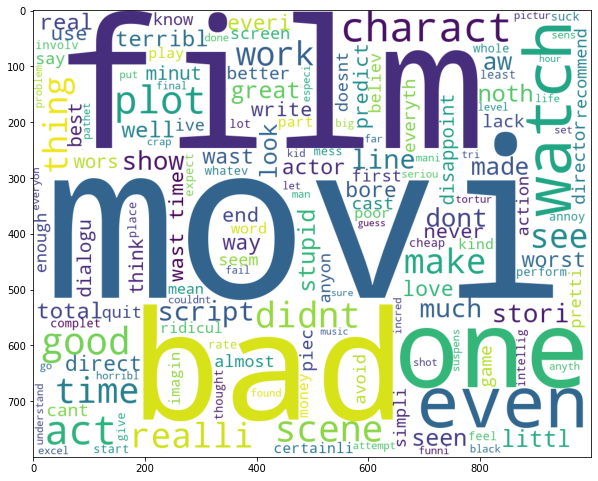

In [31]:
word_cloud = WordCloud(width = 1000, height = 800, background_color='white',max_words = 150).generate(imdb_negative_reviews)
# max_words = maximum number of words to consider based on frequency in the word cloud
plt.figure(figsize = [10,10])
plt.imshow(word_cloud)
plt.show()
# The size of the word is directly proportional to the frequency of the word.
# These are the top 150 words which occur most in the negative reviews

In [36]:
all_terms = imdb_negative_reviews.split(" ")
fdist = FreqDist(all_terms)
df_dist = pd.DataFrame(fdist.items(), columns = ['Word', 'Freq'])
df_dist.head()

,Word,Freq
0,slowmov,1
1,aimless,1
2,movi,106
3,distress,1
4,drift,2


In [37]:
# Top 5 word based on frequency
words = df_dist.sort_values(by = 'Freq', ascending = False)
words.head()

,Word,Freq
2,movi,106
57,film,86
355,bad,60
108,one,43
24,even,32


<AxesSubplot:xlabel='Word'>

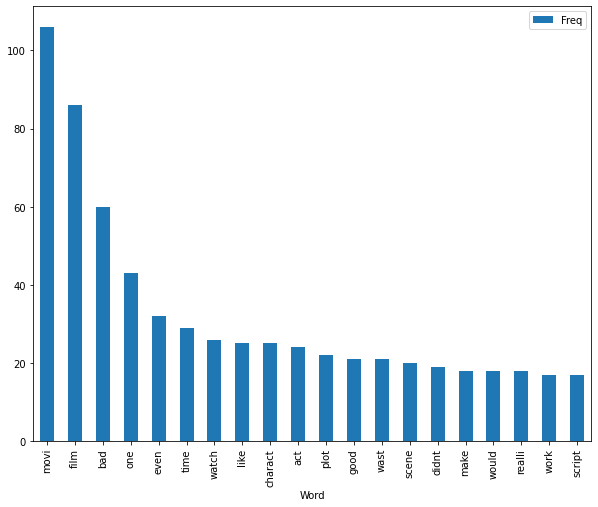

In [39]:
plt.rcParams['figure.figsize'] = (10,8)
words.head(20).plot(kind = 'bar', x = 'Word', y = 'Freq')